In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
nano = pd.read_csv('seg/nano.csv')
small = pd.read_csv('seg/small.csv')
medium = pd.read_csv('seg/medium.csv')
large = pd.read_csv('seg/large.csv')
xlarge = pd.read_csv('seg/xl.csv')

In [3]:
nano_fetch = nano['read'].to_frame()
small_fetch = small['read'].to_frame()
medium_fetch = medium['read'].to_frame()
large_fetch = large['read'].to_frame()
xlarge_fetch = xlarge['read'].to_frame()

In [4]:
nano_inf = nano['run'].to_frame()
small_inf = small['run'].to_frame()
medium_inf = medium['run'].to_frame()
large_inf = large['run'].to_frame()
xlarge_inf = xlarge['run'].to_frame()

In [5]:
nano_post = nano['write'].to_frame()
small_post = small['write'].to_frame()
medium_post = medium['write'].to_frame()
large_post = large['write'].to_frame()
xlarge_post = xlarge['write'].to_frame()

In [6]:
avg_s = pd.DataFrame({'Pre-Processing': [nano['read'].mean(),small['read'].mean(),medium['read'].mean(),large['read'].mean(),xlarge['read'].mean()],'Inference':[nano['run'].mean(),small['run'].mean(),medium['run'].mean(),large['run'].mean(),xlarge['run'].mean()],'Post-Processing':[nano['write'].mean(),small['write'].mean(),medium['write'].mean(),large['write'].mean(),xlarge['write'].mean()]},index=['Nano','Small','Medium','Large','X-Large']) 
org_s = pd.DataFrame({'Pre-Processing': [nano['read'],small['read'],medium['read'],large['read'],xlarge['read']],'Inference':[nano['run'],small['run'],medium['run'],large['run'],xlarge['run']],'Post-Processing':[nano['write'],small['write'],medium['write'],large['write'],xlarge['write']]},index=['Nano','Small','Medium','Large','X-Large']) 
test_s = pd.DataFrame({'Nano':nano['read']+nano['write']+nano['run'],'Small':small['read']+small['write']+small['run'],'Medium':medium['read']+medium['write']+medium['run'],'Large':large['read']+large['write']+large['run'],'X-Large':xlarge['read']+xlarge['write']+xlarge['run']})
test_s = test_s[1:]

In [7]:
test_s.transpose()

,1,2,3,4,5,6,7,8,9,10,...,990,991,992,993,994,995,996,997,998,999
Nano,0.353404,0.333520,0.338926,0.364508,0.351153,0.336868,0.356901,0.340073,0.336238,0.343233,...,0.333707,0.354634,0.339441,0.357567,0.361903,0.342340,0.348150,0.339666,0.340554,0.348572
Small,0.542013,0.536765,0.550130,0.549747,0.527557,0.544159,0.520587,0.538735,0.551579,0.522441,...,0.520930,0.534258,0.553477,0.548369,0.531647,0.530155,0.524994,0.526504,0.530992,0.535336
Medium,0.999259,0.986255,0.992748,1.004890,0.990570,0.987593,0.991027,1.005213,0.999532,1.014432,...,0.999382,1.008346,1.017260,1.002449,1.013208,1.027717,0.999248,0.996944,1.014703,1.019874
Large,1.484196,1.477032,1.476595,1.477586,1.476249,1.482296,1.484890,1.478826,1.482889,1.475141,...,1.484010,1.490591,1.517885,1.498611,1.481748,1.485575,1.488624,1.480531,1.505406,1.478751
X-Large,2.257776,2.252740,2.253141,2.263034,2.249834,2.259274,2.255081,2.250948,2.254215,2.256677,...,2.260491,2.251419,2.276428,2.267888,2.253590,2.261633,2.260407,2.289898,2.271026,2.254453


In [69]:
test_s.describe()

,Nano,Small,Medium,Large,X-Large
count,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.341093,0.530268,1.002025,1.485982,2.260138
std,0.007482,0.011043,0.010906,0.008457,0.008204
min,0.263483,0.445307,0.918779,1.406319,2.183333
25%,0.336585,0.523066,0.994021,1.480745,2.255048
50%,0.339300,0.528573,0.999802,1.484187,2.258857
75%,0.343720,0.535476,1.008112,1.489481,2.263394
max,0.388471,0.598375,1.056418,1.531909,2.305629


In [8]:
nano = pd.read_csv('nor/nano.csv')
small = pd.read_csv('nor/small.csv')
medium = pd.read_csv('nor/medium.csv')
large = pd.read_csv('nor/large.csv')
xlarge = pd.read_csv('nor/xl.csv')

In [9]:
avg = pd.DataFrame({'Pre-Processing': [nano['read'].mean(),small['read'].mean(),medium['read'].mean(),large['read'].mean(),xlarge['read'].mean()],'Inference':[nano['run'].mean(),small['run'].mean(),medium['run'].mean(),large['run'].mean(),xlarge['run'].mean()],'Post-Processing':[nano['write'].mean(),small['write'].mean(),medium['write'].mean(),large['write'].mean(),xlarge['write'].mean()]},index=['Nano','Small','Medium','Large','X-Large']) 
org = pd.DataFrame({'Pre-Processing': [nano['read'],small['read'],medium['read'],large['read'],xlarge['read']],'Inference':[nano['run'],small['run'],medium['run'],large['run'],xlarge['run']],'Post-Processing':[nano['write'],small['write'],medium['write'],large['write'],xlarge['write']]},index=['Nano','Small','Medium','Large','X-Large']) 
test = pd.DataFrame({'Nano':nano['read']+nano['write']+nano['run'],'Small':small['read']+small['write']+small['run'],'Medium':medium['read']+medium['write']+medium['run'],'Large':large['read']+large['write']+large['run'],'X-Large':xlarge['read']+xlarge['write']+xlarge['run']})
test = test[1:]

In [10]:
nano = pd.DataFrame([test['Nano'],test_s['Nano']],index=['Normal','Segmentation']).transpose()
small = pd.DataFrame([test['Small'],test_s['Small']],index=['Normal','Segmentation']).transpose()
medium = pd.DataFrame([test['Medium'],test_s['Medium']],index=['Normal','Segmentation']).transpose()
large = pd.DataFrame([test['Large'],test_s['Large']],index=['Normal','Segmentation']).transpose()
xlarge = pd.DataFrame([test['X-Large'],test_s['X-Large']],index=['Normal','Segmentation']).transpose()

In [11]:
total = pd.DataFrame({'Normal': [nano['Normal'].values,small['Normal'].values,medium['Normal'].values,large['Normal'].values,xlarge['Normal'].values]})
normal = pd.DataFrame({'Nano':nano['Normal'].values,'Small':small['Normal'],'Medium':medium['Normal'],'Large':large['Normal'],'X-Large':xlarge['Normal']})
# normal = normal['Nano']
# test_s = test_s['Nano']
normal['Type']='Normal'
test_s['Type']='Segmentation'
total = [normal,test_s]
total = pd.concat(total)

In [12]:
# total=total.transpose()
total
temp1 = total[['Nano','Type']]
temp1['Type']=temp1['Type']+"_n"
temp2 = total[['Small','Type']]
temp2['Type']=temp2['Type']+"_s"
temp3 = total[['Medium','Type']]
temp3['Type']=temp3['Type']+"_m"
temp4 = total[['Large','Type']]
temp4['Type']=temp4['Type']+"_l"
temp5 = total[['X-Large','Type']]
temp5['Type']=temp5['Type']+"_x"
final = [temp1,temp2,temp3,temp4,temp5]
final = pd.concat(final)
final

/tmp/ipykernel_10771/2662384756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Type']=temp1['Type']+"_n"
/tmp/ipykernel_10771/2662384756.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['Type']=temp2['Type']+"_s"
/tmp/ipykernel_10771/2662384756.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,Nano,Type,Small,Medium,Large,X-Large
1,0.226071,Normal_n,NaN,NaN,NaN,NaN
2,0.223804,Normal_n,NaN,NaN,NaN,NaN
3,0.221883,Normal_n,NaN,NaN,NaN,NaN
4,0.223282,Normal_n,NaN,NaN,NaN,NaN
5,0.221741,Normal_n,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
995,NaN,Segmentation_x,NaN,NaN,NaN,2.261633
996,NaN,Segmentation_x,NaN,NaN,NaN,2.260407
997,NaN,Segmentation_x,NaN,NaN,NaN,2.289898
998,NaN,Segmentation_x,NaN,NaN,NaN,2.271026


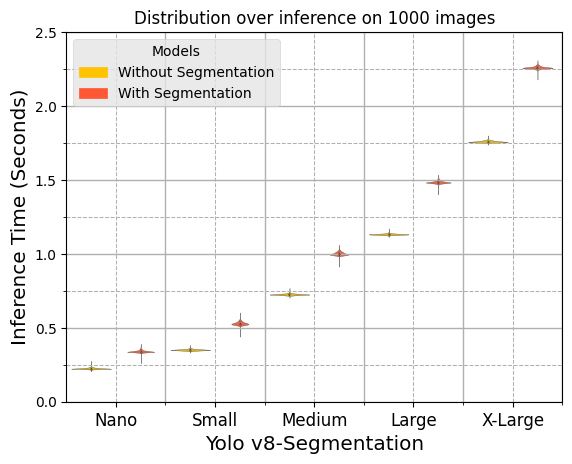

In [13]:
fig, axs = plt.subplots(1)
ax1 = sns.violinplot(data=final,x='Type',y='Nano',linewidth=0.25, palette=["#FFC300","#FF5733"])
ax2 = sns.violinplot(data=final,x='Type',y='Small',linewidth=0.25, palette=["#FFC300","#FF5733"])
ax3 = sns.violinplot(data=final,x='Type',y='Medium',linewidth=0.25, palette=["#FFC300","#FF5733"])
ax4 = sns.violinplot(data=final,x='Type',y='Large',linewidth=0.25, palette=["#FFC300","#FF5733"])
ax5 = sns.violinplot(data=final,x='Type',y='X-Large',linewidth=0.25, palette=["#FFC300","#FF5733"])
plt.minorticks_on()
axs.set_xticks([0.5,2.5,4.5,6.5,8.5])
axs.set_xticklabels(['Nano','Small','Medium','Large','X-Large'])
axs.set_xticks([1.5,3.5,5.5,7.5,9.5],minor=True)
plt.title("Distribution over inference on 1000 images")
plt.xlabel('Yolo v8-Segmentation',fontsize='x-large')
plt.ylabel('Inference Time (Seconds)',fontsize='x-large')
plt.style.use('ggplot')
axs.yaxis.grid(which='major',linestyle = '-', linewidth = 1)
axs.yaxis.grid(which='minor',linestyle = '--', linewidth = 0.75)
axs.xaxis.grid(which='major',linestyle = '--', linewidth = 0.75)
axs.xaxis.grid(which='minor',linestyle = '-', linewidth = 1)
plt.yticks(ticks=np.arange(0, 2.5, step=0.25),fontsize='large',minor=True)  
plt.ylim(0,2.5)
wo_seg = mpatches.Patch(color='#FFC300')
w_seg = mpatches.Patch(color='#FF5733')
plt.legend(labels=['Without Segmentation','With Segmentation'],handles=[wo_seg,w_seg],title='Models')
plt.xticks(fontsize='large',rotation='horizontal')
plt.savefig('violin_.jpg')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Nano'),
  Text(1, 0, 'Small'),
  Text(2, 0, 'Medium'),
  Text(3, 0, 'Large'),
  Text(4, 0, 'X-Large')])

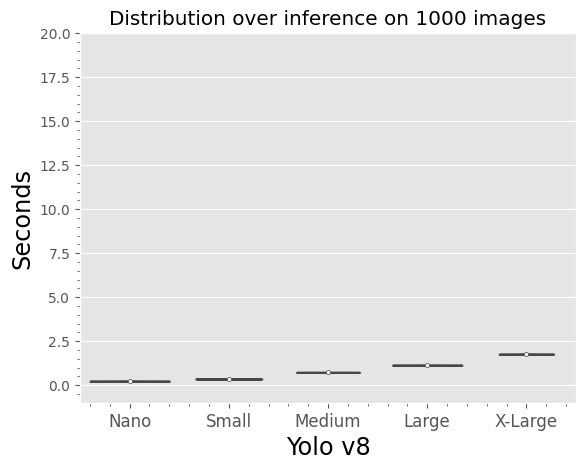

In [14]:
#sns.violinplot(nano['run']+nano['read']+nano['write'])
#sns.violinplot(large['run']+large['read']+large['write'])
sns.violinplot(test)
plt.title("Distribution over inference on 1000 images")
plt.xlabel('Yolo v8',fontsize='xx-large')
plt.ylabel('Seconds',fontsize='xx-large')
plt.style.use('ggplot')
plt.yticks(ticks=np.arange(0, 20, step=2.5),fontsize='large',minor=True)  # Set label locations.
plt.ylim(-1,20)
plt.minorticks_on()
plt.xticks(fontsize='large',rotation='horizontal')
# plt.savefig('nor_violin.jpg')

In [58]:
avg_s=avg_s*1000

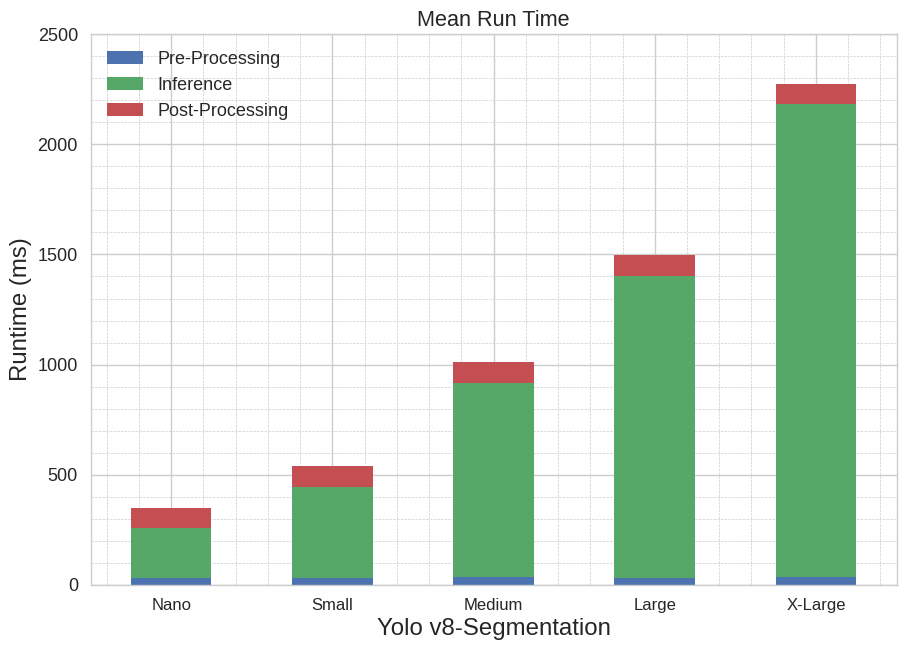

In [59]:

plt.style.use('seaborn-v0_8-talk')
avg_s.plot(kind='bar', stacked=True)
plt.title('Mean Run Time')
plt.xlabel('Yolo v8-Segmentation',fontsize='xx-large')
plt.ylabel('Runtime (ms)',fontsize='xx-large')
plt.yticks(ticks=np.arange(0, 2700, step=500),fontsize='large',minor=True)  # Set label locations.
plt.minorticks_on()
plt.xticks(fontsize='large',rotation='horizontal')
plt.grid(which='major',linestyle = '-', linewidth = 1)
plt.grid(which='minor',linestyle = '--', linewidth = 0.5)
plt.savefig('seg.jpg')

In [62]:
avg=avg*1000

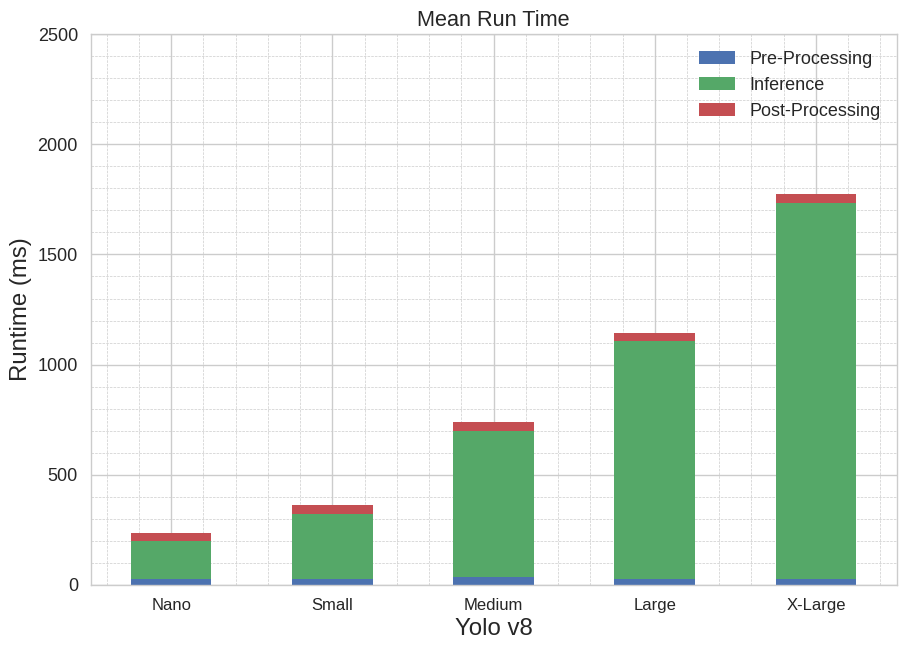

In [68]:
plt.style.use('seaborn-v0_8-whitegrid')
avg.plot(kind='bar', stacked=True)
plt.title('Mean Run Time')
plt.xlabel('Yolo v8',fontsize='xx-large')
plt.ylabel('Runtime (ms)',fontsize='xx-large')
plt.yticks(ticks=np.arange(0, 2700, step=500),fontsize='large',minor=True)
plt.xticks(fontsize='xx-large')
plt.minorticks_on()
plt.xticks(fontsize='large',rotation='horizontal')
plt.grid(which='major',linestyle = '-', linewidth = 1)
plt.grid(which='minor',linestyle = '--', linewidth = 0.5)
plt.savefig('nor_seg.jpg')

In [74]:
test_s.describe([0.5,0.9,0.95,0.99])*1000

,Nano,Small,Medium,Large,X-Large
count,999000.000000,999000.000000,999000.000000,999000.000000,999000.000000
mean,341.092995,530.267571,1002.024554,1485.982242,2260.137718
std,7.481622,11.042817,10.905727,8.456743,8.203849
min,263.483286,445.307255,918.778658,1406.318665,2183.333397
50%,339.299679,528.572798,999.802113,1484.187365,2258.857250
90%,349.789953,545.231533,1016.491699,1497.493172,2270.785618
95%,355.837774,550.130677,1022.258353,1502.662563,2276.020002
99%,366.998181,560.040078,1031.850471,1511.490631,2284.339042
max,388.470888,598.374605,1056.417942,1531.908989,2305.628777


In [75]:
test.describe([0.5,0.9,0.95,0.99])*1000

,Nano,Small,Medium,Large,X-Large
count,999000.000000,999000.000000,999000.000000,999000.000000,999000.000000
mean,225.335208,351.099117,726.324152,1132.866519,1759.245984
std,5.000016,4.443604,5.545902,4.235540,6.060518
min,207.278728,333.300591,706.281185,1116.110802,1741.116762
50%,224.269629,350.695610,725.733757,1132.514477,1758.059263
90%,230.575466,356.291771,731.635857,1137.839031,1767.164040
95%,233.786297,358.807755,734.807682,1139.725399,1769.788361
99%,239.414949,363.252077,746.851225,1145.066991,1777.097950
max,274.808884,381.590843,766.521215,1170.438051,1798.697233
